<a href="https://colab.research.google.com/github/madhura-kansara-sf/face_recognition/blob/main/facenet_basic_draw_boxes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision facenet-pytorch matplotlib opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.5 MB/s eta 0:00:00


In [ ]:
import torch
from facenet_pytorch import MTCNN
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#instance of the mtcnn face detector
mtcnn= MTCNN(keep_all=True, device=device)

In [ ]:
#load using opencv
img = cv2.imread('/content/friends.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#CONVERT IMG TO PIL FORMAT
pil_img= Image.fromarray(img)

#use mtcnn to detect faces in the img
boxes, _ = mtcnn.detect(pil_img)


number of faces detected: 8


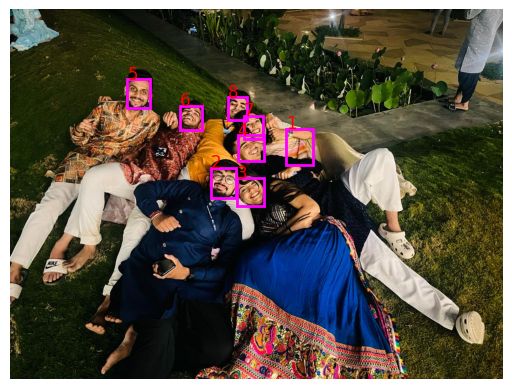

In [ ]:
#DRAW BUNDING BOXES AND LABEL EACH FACE

fig,ax = plt.subplots()
ax.imshow(img)

if boxes is not None:
  for i, box in enumerate(boxes):
    ax.text(box[0],box[1],str(i+1),fontsize=12,color='red')
    rect = plt.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1], fill=False, color='magenta',linewidth=2)
    ax.add_patch(rect)

  print(f"number of faces detected: {len(boxes)}")
else:
  print("no faces detected")

plt.axis("off")
plt.show()